In [28]:
#Clustering of shopping data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
col_0   count
Genre        
Female    112
Male     

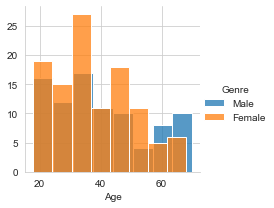

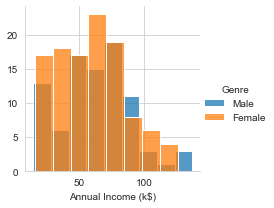

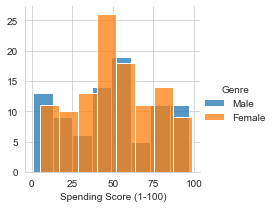

In [34]:
# reading the data from shopping-data.csv

sh_data = pd.read_csv("shopping-data.csv")
print(sh_data.info())
print(sh_data.head())

#Frequency distribution of Genre

# Make a crosstab and name the count column
sh_data_outcome = pd.crosstab(index=sh_data["Genre"], columns="count") 
print(sh_data_outcome)

#Histograms of flower attributes
sns.FacetGrid(sh_data, hue="Genre", height=3).map(sns.histplot, "Age").add_legend()
sns.FacetGrid(sh_data, hue="Genre", height=3).map(sns.histplot, "Annual Income (k$)").add_legend()
sns.FacetGrid(sh_data, hue="Genre", height=3).map(sns.histplot, "Spending Score (1-100)").add_legend()
plt.show()


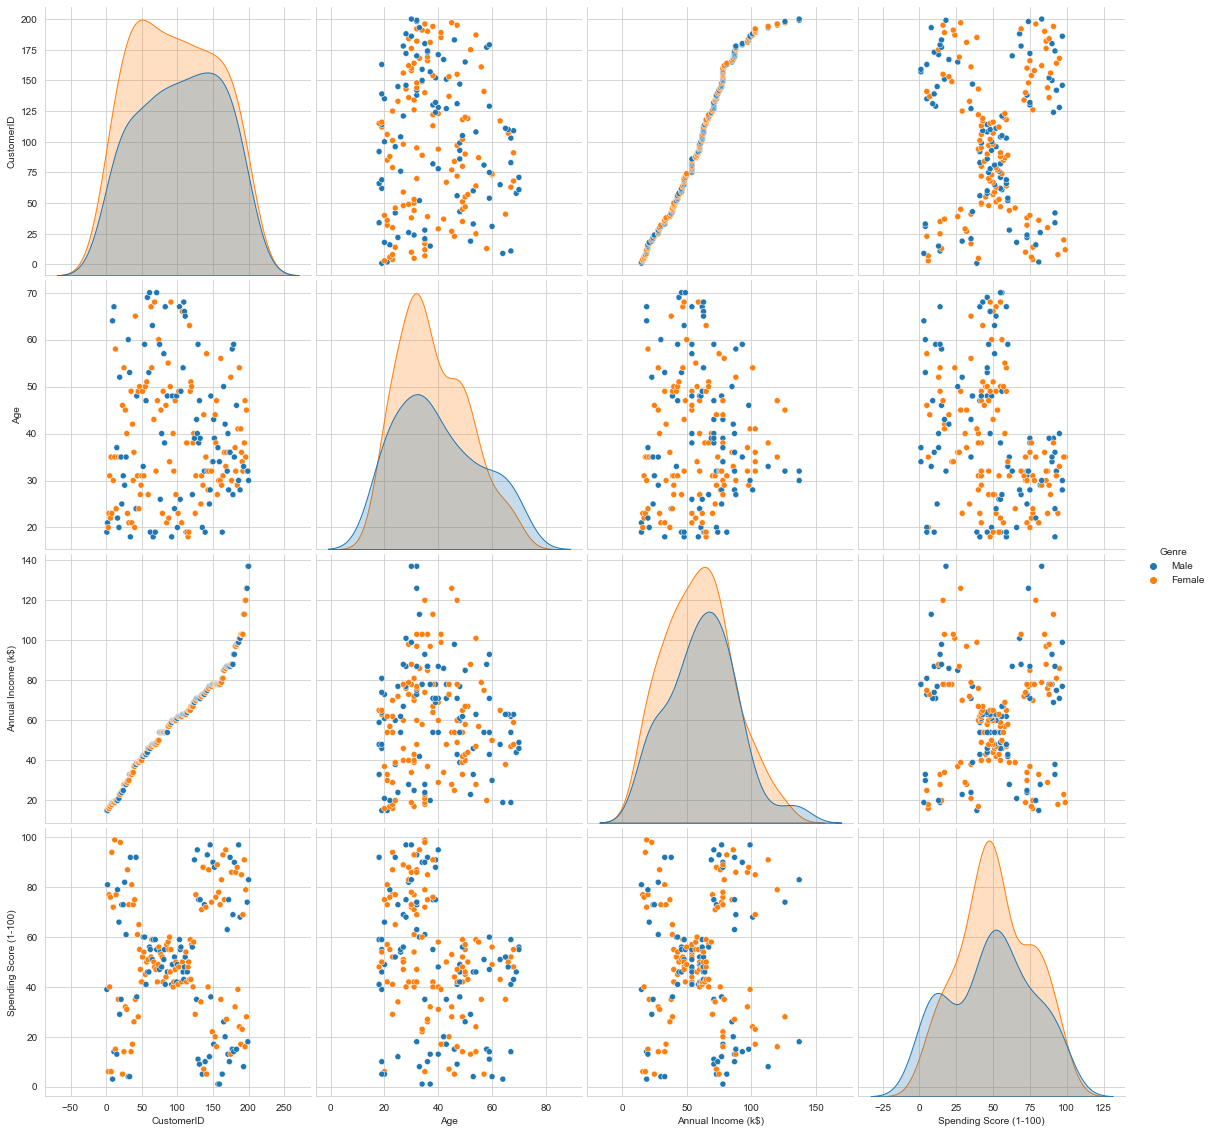

In [31]:
#Scatter plot of features according to Genre
sns.set_style("whitegrid")
sns.pairplot(sh_data, hue="Genre", height=4);
plt.show()

     Age  Annual Income (k$)  Spending Score (1-100)
0     19                  15                      39
1     21                  15                      81
2     20                  16                       6
3     23                  16                      77
4     31                  17                      40
..   ...                 ...                     ...
195   35                 120                      79
196   45                 126                      28
197   32                 126                      74
198   32                 137                      18
199   30                 137                      83

[200 rows x 3 columns]


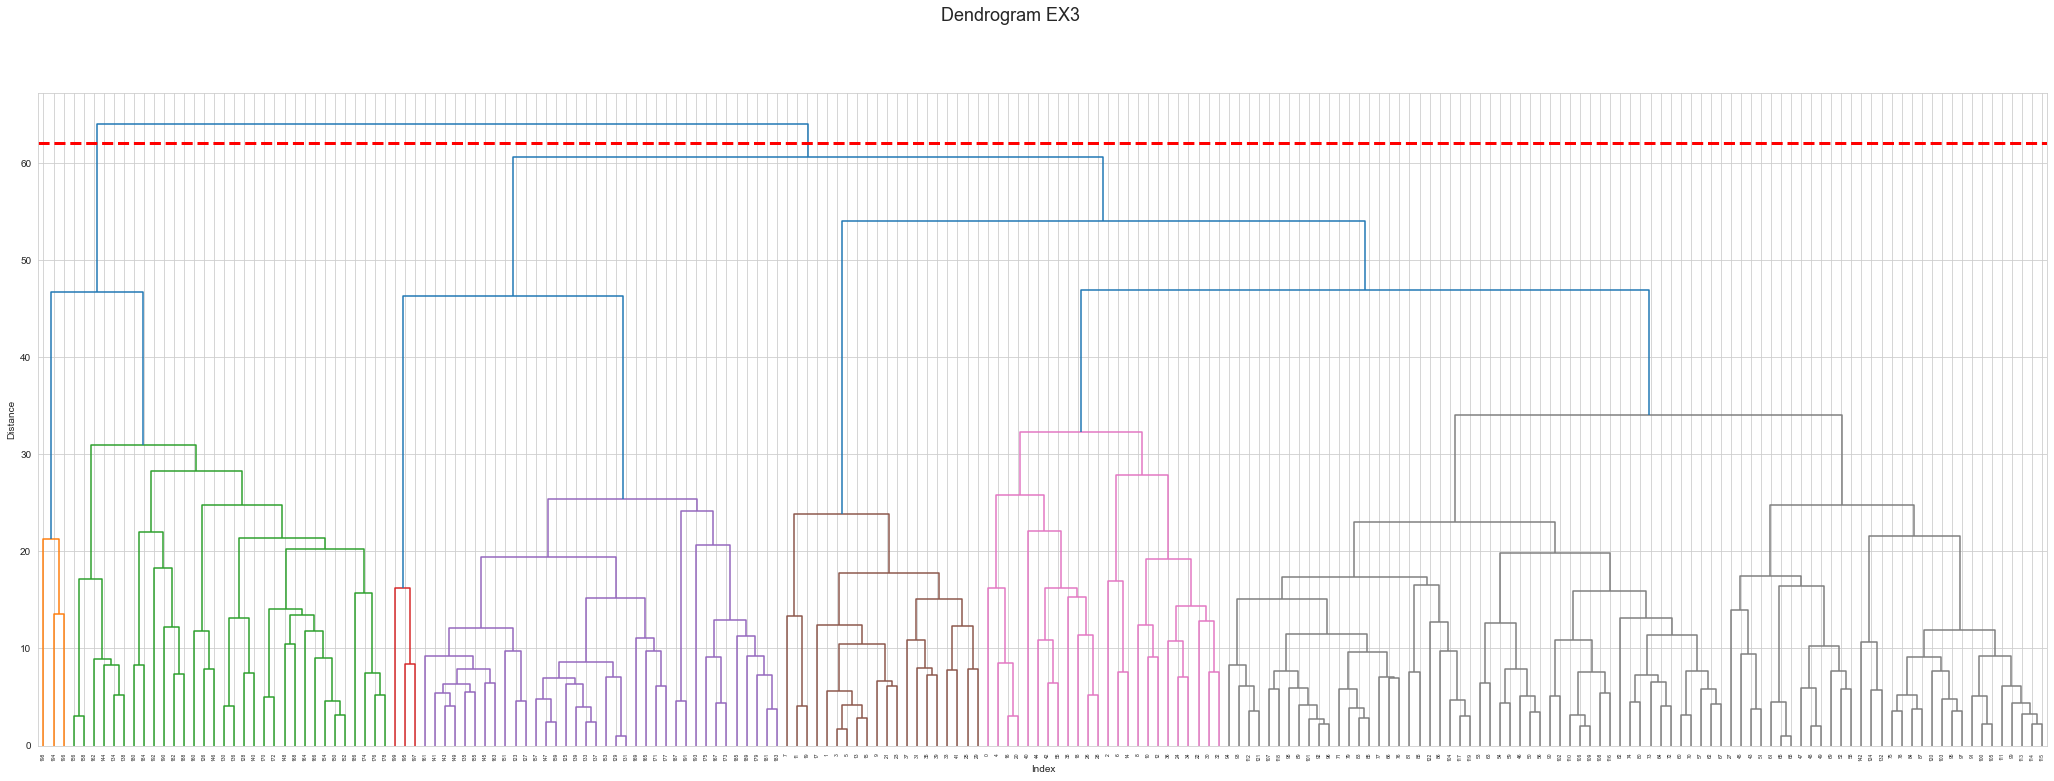

In [18]:
# draw dendograms

from scipy.cluster.hierarchy import dendrogram, linkage

x_axies = sh_data.loc[:,["Age","Annual Income (k$)","Spending Score (1-100)"]]
print(x_axies)
dist_sin = linkage(x_axies, method="average")
plt.figure(figsize=(36,12))
dendrogram(dist_sin, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram EX3", fontsize=18)

# add horizontal line to find the tallest uncut vertical line
plt.axhline(y=62, c='red', lw=3, linestyle='dashed')
plt.show()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]


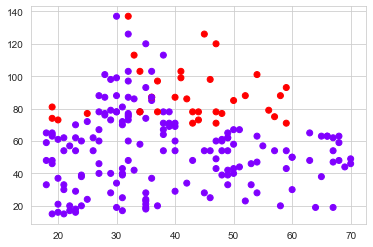

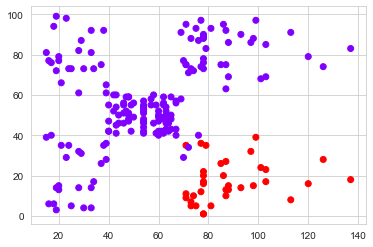

In [19]:
# applying the hierarchical clustering algorithm with 2 clusters
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
cluster.fit_predict(x_axies)
print(cluster.labels_)

#Plot the clusters

#Plot Age, Annual Income (k$) and Spending Score (1-100)
data = x_axies.iloc[:, 0:2].values
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')
plt.show()

data = x_axies.iloc[:, 1:3].values
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')
plt.show()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


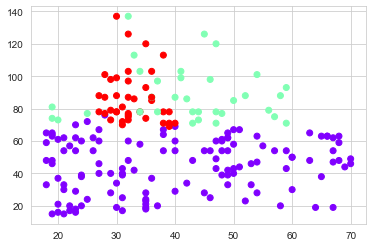

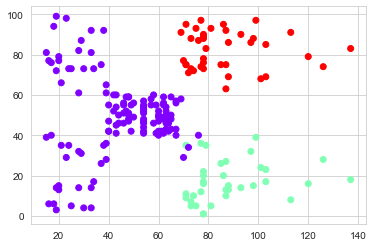

In [20]:
# applying the hierarchical clustering algorithm with 3 clusters
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
cluster.fit_predict(x_axies)
print(cluster.labels_)

#Plot the clusters

#Plot Age, Annual Income (k$) and Spending Score (1-100)
data = x_axies.iloc[:, 0:2].values
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')
plt.show()

data = x_axies.iloc[:, 1:3].values
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')
plt.show()

In [21]:
# HAC evaluation

# Add hierarchical clustering result to data set
from scipy.cluster.hierarchy import fcluster
sh_HAC = sh_data.copy()

# fcluster : forms flat clusters from the hierarchical clustering defined by the given linkage matrix
sh_HAC['K=2'] = fcluster(dist_sin, 2, criterion='maxclust')
sh_HAC['K=3'] = fcluster(dist_sin, 3, criterion='maxclust')
sh_HAC.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),K=2,K=3
0,1,Male,19,15,39,2,3
1,2,Male,21,15,81,2,3
2,3,Female,20,16,6,2,3
3,4,Female,23,16,77,2,3
4,5,Female,31,17,40,2,3


<AxesSubplot:title={'center':'Genre'}, xlabel='Age', ylabel='Spending Score (1-100)'>

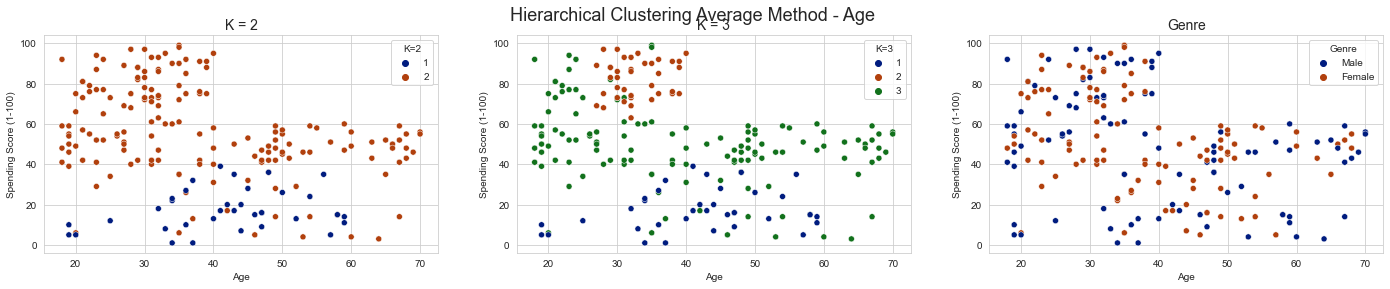

In [27]:
plt.figure(figsize=(24,4))

plt.suptitle("Hierarchical Clustering Average Method - Age",fontsize=18)

plt.subplot(1,3,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="Age",y="Spending Score (1-100)", data=sh_HAC, hue="K=2", palette='dark')

plt.subplot(1,3,2)
plt.title("K = 3",fontsize=14)
sns.scatterplot(x="Age",y="Spending Score (1-100)", data=sh_HAC, hue="K=3", palette='dark')

plt.subplot(1,3,3)
plt.title("Genre",fontsize=14)
sns.scatterplot(x="Age",y="Spending Score (1-100)", data=sh_HAC, hue="Genre", palette='dark')

<AxesSubplot:title={'center':'Genre'}, xlabel='Age', ylabel='Annual Income (k$)'>

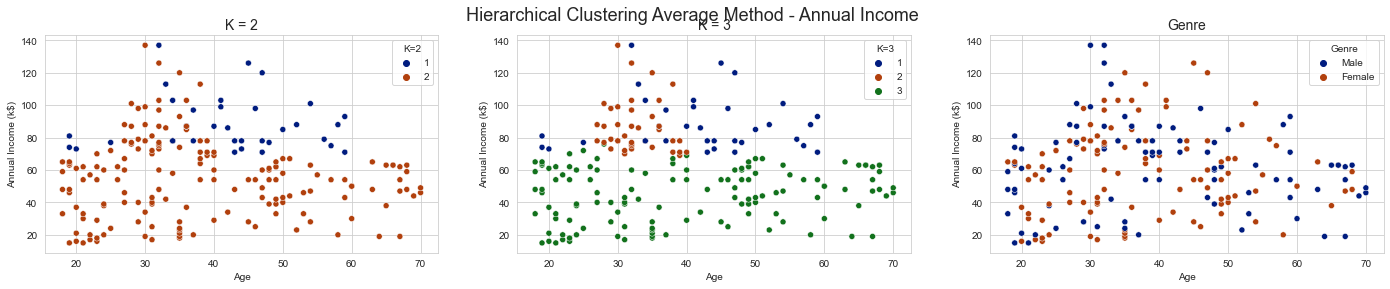

In [26]:
plt.figure(figsize=(24,4))

plt.suptitle("Hierarchical Clustering Average Method - Annual Income",fontsize=18)

plt.subplot(1,3,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="Age",y="Annual Income (k$)", data=sh_HAC, hue="K=2", palette='dark')

plt.subplot(1,3,2)
plt.title("K = 3",fontsize=14)
sns.scatterplot(x="Age",y="Annual Income (k$)", data=sh_HAC, hue="K=3", palette='dark')

plt.subplot(1,3,3)
plt.title("Genre",fontsize=14)
sns.scatterplot(x="Age",y="Annual Income (k$)", data=sh_HAC, hue="Genre", palette='dark')